In [4]:
# 30
# 解析結果の読み込み

import re


with open("neko.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

morfemes = []
for line in lines:
    if("EOS" in line):
        pass
    else:
        line_split = re.split("[\t\n,]", line)
        w_dict = {"surface": line_split[0], "base": line_split[7], "pos": line_split[1], "pos1": line_split[2]}
        morfemes.append(w_dict)


print(morfemes[0])

{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}


In [5]:
# 31
# 動詞の基本形を抽出する

verbs_surface = [morfeme["surface"] for morfeme in morfemes if(morfeme["pos"] == "動詞")]

print(verbs_surface[0:10])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


In [6]:
# 32
# 動詞の基本形をすべて抽出する

verbs_surface = [morfeme["base"] for morfeme in morfemes if(morfeme["pos"] == "動詞")]

print(verbs_surface[0:10])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


In [7]:
# 33
# 「の」で連結されている名詞句を抽出する


noun_phrase = [
    morfemes[i-1]["surface"] + morfemes[i]["surface"] + morfemes[i+1]["surface"] 
    for i in range(len(morfemes)) 
    if(morfemes[i]["surface"] == "の" and morfemes[i]["pos"] == "助詞")
    ]

print(noun_phrase[0:10])

['彼の掌', '掌の上', '書生の顔', 'ものの見', 'はずの顔', '顔の真中', '穴の中', '人間の飲む', '書生の掌', '掌の裏']


In [8]:
# 34
# 名詞の連接を最長一致で抽出

nouns = ""
noun_chain = 0
nouns_list = []
for morfeme in morfemes:
    if(morfeme["pos"] == "名詞"):
        nouns += morfeme["surface"]
        noun_chain += 1
    else:
        if(noun_chain >= 2):
            nouns_list.append(nouns)
        nouns = ""
        noun_chain = 0

print(nouns_list[0:10])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']


In [11]:
# 35
# 単語とその出現頻度のペアを求め、出現頻度の高い順に並べる

morfeme_freqs = {}
for morfeme in morfemes:
    word = morfeme["base"] + morfeme["pos"]
    if(not word in morfeme_freqs):
        morfeme_freqs[word] = 1
    else:
        morfeme_freqs[word] += 1

sorted_morfeme_freqs = sorted(morfeme_freqs.items(), key=lambda x:x[1], reverse=True)
print(sorted_morfeme_freqs[0:10])

[('の助詞', 7583), ('。記号', 7486), ('て助詞', 6848), ('、記号', 6772), ('は助詞', 6420), ('に助詞', 6243), ('を助詞', 6071), ('だ助動詞', 5975), ('と助詞', 5505), ('が助詞', 5334)]


<BarContainer object of 10 artists>

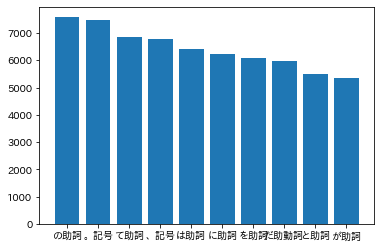

In [19]:
# 36 
# 単語の出現頻度をグラフで表示する

import matplotlib.pyplot as plt
import japanize_matplotlib

x = [sorted_morfeme_freqs[i][0] for i in range(len(sorted_morfeme_freqs))]
y = [sorted_morfeme_freqs[i][1] for i in range(len(sorted_morfeme_freqs))]

plt.bar(x[0:10], y[0:10])

<BarContainer object of 10 artists>

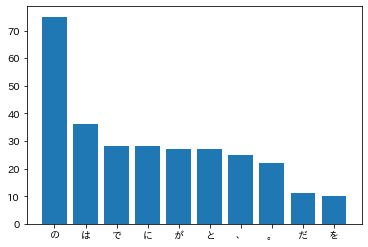

In [21]:
# 37
# 「猫」と共起頻度の高い上位10語をグラフで表示

import matplotlib.pyplot as plt
import japanize_matplotlib
import collections


morfeme_freqs_neko = collections.Counter([])
for i in range(len(morfemes)):
    if(morfemes[i]["base"] == "猫"):
        words = [morfemes[i-1]["surface"], morfemes[i+1]["surface"]]
        morfeme_freqs_neko += collections.Counter(words)

sorted_morfeme_freqs_neko = morfeme_freqs_neko.most_common()

x = [sorted_morfeme_freqs_neko[i][0] for i in range(len(sorted_morfeme_freqs_neko))]
y = [sorted_morfeme_freqs_neko[i][1] for i in range(len(sorted_morfeme_freqs_neko))]

plt.bar(x[0:10], y[0:10])


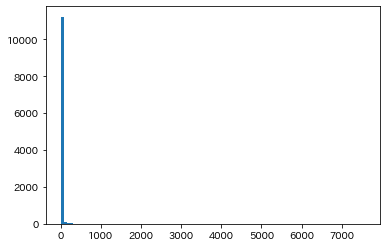

In [41]:
# 38 
# 単語の出現頻度のヒストグラムを書く。ただし、横軸が出現頻度、縦軸が単語の種類数である

import matplotlib.pyplot as plt

y = [sorted_morfeme_freqs[i][1] for i in range(len(sorted_morfeme_freqs))]

plt.hist(y, bins=100)

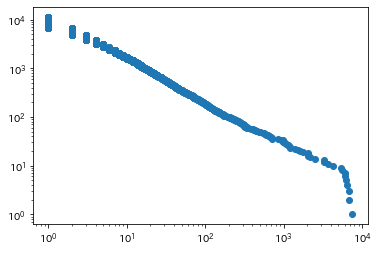

In [44]:
# 39
# Zipfの法則: 単語の出現頻度順位を横軸、出現頻度を縦軸として、両対数グラフをプロットする

import matplotlib.pyplot as plt

y = [sorted_morfeme_freqs[i][1] for i in range(len(sorted_morfeme_freqs))]
z = [i for i in range(len(sorted_morfeme_freqs))]

plt.xscale("log")
plt.yscale("log")
plt.scatter(y, z)